In [116]:
# Import library yang di perlukan
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve,cross_val_predict
from sklearn.decomposition import PCA
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [117]:
# Ganti path dataset sesuai dengan struktur folder Anda
dataset_train = Path('./Wayangs/train')
dataset_val = Path('./Wayangs/val')

In [118]:
# Inisialisasi list untuk menyimpan path gambar dan label
data_train = []
labels_train = []
data_val = []
labels_val = []

In [119]:
# Loop melalui setiap subfolder (kelas) dalam dataset pelatihan
for class_folder in dataset_train.iterdir():
    if class_folder.is_dir():
        class_label = str(class_folder.name)

        # Loop melalui setiap gambar dalam subfolder
        for img_path in class_folder.iterdir():
            # Tambahkan path gambar dan label ke dalam list pelatihan
            data_train.append(str(img_path))
            labels_train.append(class_label)

# Loop melalui setiap subfolder (kelas) dalam dataset pengujian
for class_folder in dataset_val.iterdir():
    if class_folder.is_dir():
        class_label = str(class_folder.name)

        # Loop melalui setiap gambar dalam subfolder
        for img_path in class_folder.iterdir():
            # Tambahkan path gambar dan label ke dalam list pengujian
            data_val.append(str(img_path))
            labels_val.append(class_label)

In [120]:
# Pra-pemrosesan: membaca dan mereshape gambar pelatihan
X_train = np.array([cv2.resize(cv2.imread(
    img_path, cv2.IMREAD_GRAYSCALE), (128, 128)).flatten() for img_path in data_train])
y_train = np.array(labels_train)

In [121]:
# Pra-pemrosesan: membaca dan mereshape gambar pengujian
X_val = np.array([cv2.resize(cv2.imread(
    img_path, cv2.IMREAD_GRAYSCALE), (128, 128)).flatten() for img_path in data_val])
y_val = np.array(labels_val)

In [122]:
# Pra-pemrosesan: normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [123]:
# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', C=10, gamma='auto')

In [124]:
# Latih model pada data pelatihan
svm_model.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [125]:
# Catat waktu awal
start_time = time.time()

# Catat waktu akhir
end_time = time.time()

# Hitung waktu pelatihan
training_time = end_time - start_time

In [126]:
# Lakukan prediksi pada data pengujian
y_pred_val = svm_model.predict(X_val)

# Evaluasi akurasi pada data pengujian
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Akurasi pada Data Uji: {accuracy_val}')

Akurasi pada Data Uji: 0.7543859649122807


In [127]:
# Hitung dan tampilkan Confusion Matrix dan Classification Report pada data pengujian
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
class_report_val = classification_report(y_val, y_pred_val)

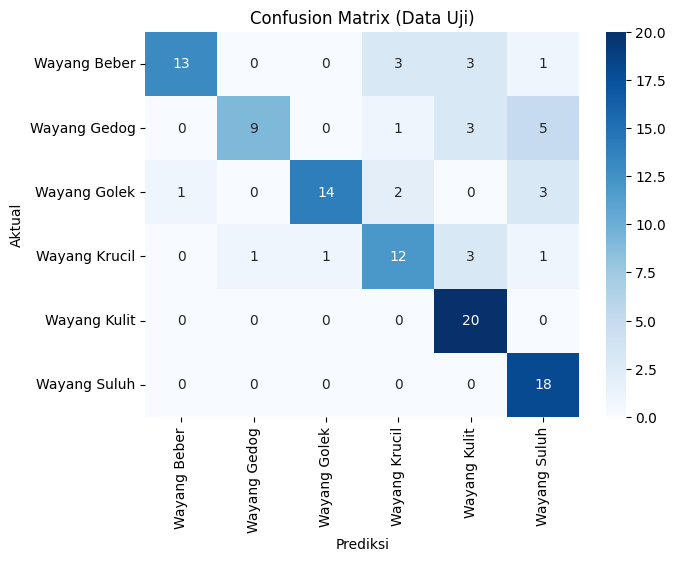

In [128]:
# Visualisasi Confusion Matrix (Data Uji)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title('Confusion Matrix (Data Uji)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [129]:
# Tampilkan hasil evaluasi pada data pengujian
print('Confusion Matrix (Data Uji):')
print(conf_matrix_val)

# Interpretasi hasil
print("\nInterpretasi Hasil:")
print("1. Kinerja Model:")
print(f"   - Akurasi pada Data Uji: {accuracy_val}")
print(f"   - Waktu Pelatihan: {training_time} detik")

# Evaluasi Kelas
print("\n2. Evaluasi Kelas:")
print(class_report_val)


print("\n3. Kesalahan Umum:")
incorrect_predictions = np.where(y_val != y_pred_val)[0]

for idx in incorrect_predictions:
    true_label = y_val[idx]
    predicted_label = y_pred_val[idx]

    print(f"   - Gambar dengan index {idx}:")
    print(f"     Label Asli: {true_label}")
    print(f"     Label Prediksi: {predicted_label}")
    print(f"     Path Gambar: {data_val[idx]}")
    print("\n")

Confusion Matrix (Data Uji):
[[13  0  0  3  3  1]
 [ 0  9  0  1  3  5]
 [ 1  0 14  2  0  3]
 [ 0  1  1 12  3  1]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]

Interpretasi Hasil:
1. Kinerja Model:
   - Akurasi pada Data Uji: 0.7543859649122807
   - Waktu Pelatihan: 7.987022399902344e-05 detik

2. Evaluasi Kelas:
               precision    recall  f1-score   support

 Wayang Beber       0.93      0.65      0.76        20
 Wayang Gedog       0.90      0.50      0.64        18
 Wayang Golek       0.93      0.70      0.80        20
Wayang Krucil       0.67      0.67      0.67        18
 Wayang Kulit       0.69      1.00      0.82        20
 Wayang Suluh       0.64      1.00      0.78        18

     accuracy                           0.75       114
    macro avg       0.79      0.75      0.75       114
 weighted avg       0.80      0.75      0.75       114


3. Kesalahan Umum:
   - Gambar dengan index 18:
     Label Asli: Wayang Beber
     Label Prediksi: Wayang Kulit
     Path Gambar: Waya

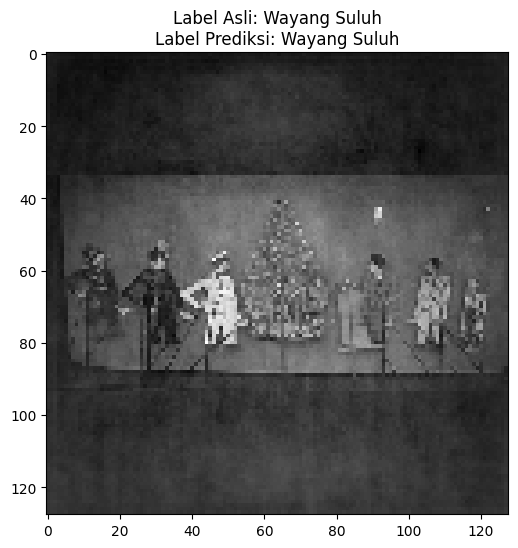

In [130]:
# Path gambar yang ingin ditampilkan
image_path = Path('./Wayangs/val/Wayang Suluh/30_Suluh.jpg')

# Dapatkan indeks numerik dari X_val yang sesuai dengan path gambar
index_val = np.where(np.array(data_val) == str(image_path))[0][0]
image_val = X_val[index_val].reshape(128, 128)
true_label_val = y_val[index_val]
predicted_label_val = y_pred_val[index_val]

# Tampilkan gambar
plt.figure(figsize=(8, 6))
plt.imshow(image_val, cmap='gray')
plt.title(
    f'Label Asli: {true_label_val}\nLabel Prediksi: {predicted_label_val}')
plt.show()


In [131]:
# Print informasi tentang sampel dari data pengujian
print('Softmax Values:', svm_model.decision_function(
    X_val[index_val].reshape(1, -1)))

Softmax Values: [[ 0.74107998  1.76364553  4.25650291  3.13756683 -0.25400902  5.27848668]]


In [132]:
# hayperplane SVM dengan PCA 2D plot (2 komponen) untuk data pelatihan dan pengujian (val)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [133]:
# Konversi label kelas ke nilai numerik untuk keperluan plotting
label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
numeric_labels_train = np.array([label_mapping[label] for label in y_train])
numeric_labels_val = np.array([label_mapping[label] for label in y_val])

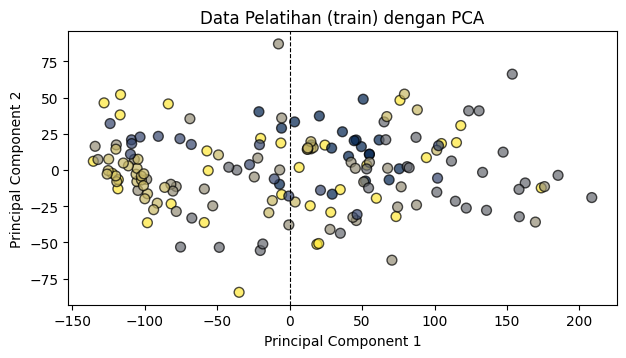

In [134]:
# Hyperplane SVM dengan PCA 2D plot (2 komponen) untuk data pembelajaran (train)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1, aspect='equal') 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=numeric_labels_train, cmap='cividis', marker='o', edgecolors='k', s=50, alpha=0.7)


plt.title('Data Pelatihan (train) dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Pemisah antara dua subplot
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()

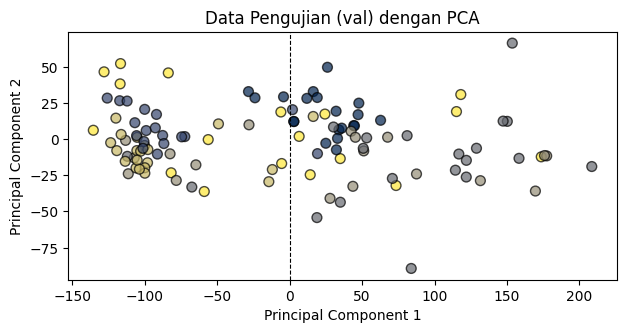

In [135]:
# Hyperplane SVM dengan PCA 2D plot (2 komponen) untuk data pengujian (val)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2, aspect='equal') 
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1],
            c=numeric_labels_val, cmap='cividis', marker='o', edgecolors='k', s=50, alpha=0.7)

plt.title('Data Pengujian (val) dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Pemisah antara dua subplot
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()

In [136]:
# Print informasi tentang support vectors
print('Jumlah Support Vectors:', len(svm_model.support_vectors_))

Jumlah Support Vectors: 167


In [137]:
# Print indeks support vectors
print('Indeks Support Vectors:', svm_model.support_)

Indeks Support Vectors: [ 33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150   0   1   2   3   4   5   6   7   8   9
  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32]


In [138]:
# Tambahkan print untuk titik-titik yang tidak terdapat di PCA
missing_points = set(range(len(X_train))) - set(svm_model.support_)
print('Indeks Titik yang Tidak Terdapat di PCA:', missing_points)

Indeks Titik yang Tidak Terdapat di PCA: set()


In [139]:
# Definisikan metode validasi silang (cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lakukan cross-validation untuk mengukur akurasi
cross_val_scores = cross_val_score(
    svm_model, X_train, y_train, cv=cv, scoring='accuracy')

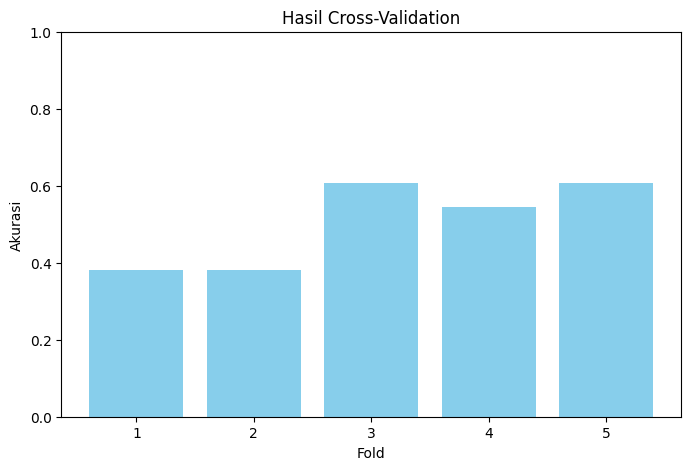

Rata-rata Akurasi: 0.5044563279857397
Deviasi Standar: 0.10212363744250107


In [140]:
# Visualisasi hasil cross-validation dengan barplot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cross_val_scores) + 1), cross_val_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.title('Hasil Cross-Validation')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1 untuk akurasi
plt.show()

# Cetak rata-rata dan deviasi standar akurasi cross-validation
print(f'Rata-rata Akurasi: {cross_val_scores.mean()}')
print(f'Deviasi Standar: {cross_val_scores.std()}')

Confusion Matrix - Fold 1:
[[1 0 0 1 2 0]
 [0 0 0 1 2 0]
 [0 0 2 2 0 2]
 [2 0 2 1 1 1]
 [0 0 0 0 6 1]
 [0 0 0 3 1 3]]



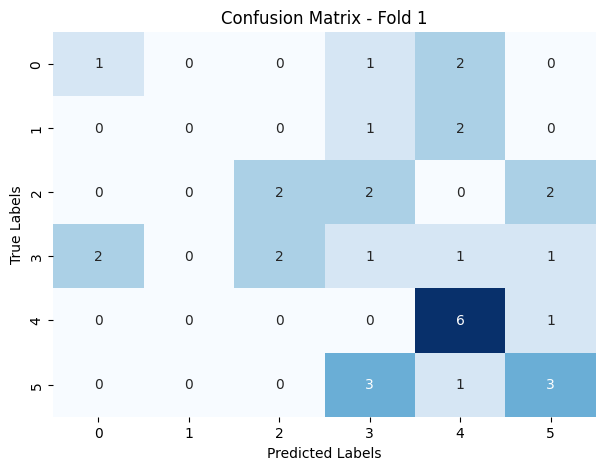

Confusion Matrix - Fold 2:
[[2 0 0 2 0 0]
 [0 2 1 0 1 0]
 [1 1 3 0 0 1]
 [1 0 1 0 1 3]
 [0 0 0 0 5 2]
 [0 0 2 3 1 1]]



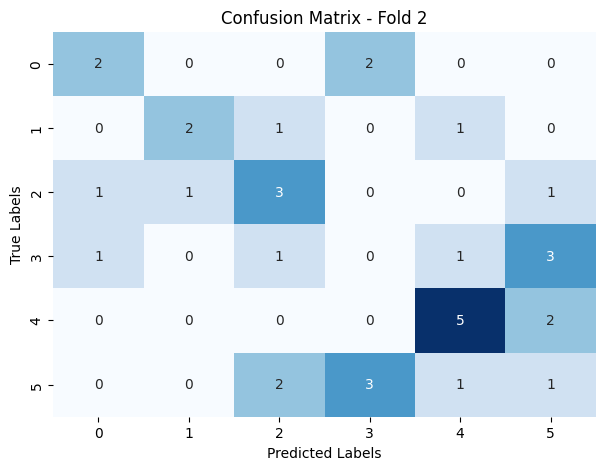

Confusion Matrix - Fold 3:
[[3 0 0 0 0 1]
 [0 0 0 2 1 0]
 [0 0 6 0 0 0]
 [2 0 0 2 1 1]
 [1 0 0 1 4 1]
 [1 1 0 0 0 5]]



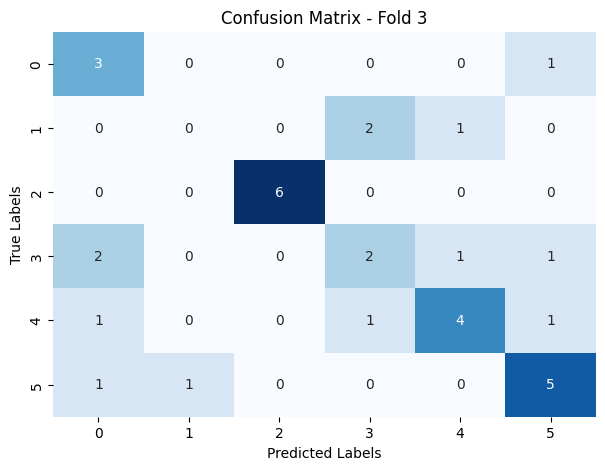

Confusion Matrix - Fold 4:
[[1 0 0 1 2 0]
 [0 0 1 0 0 2]
 [0 0 5 1 0 0]
 [0 0 0 2 4 1]
 [0 1 0 0 6 0]
 [0 0 1 1 0 4]]



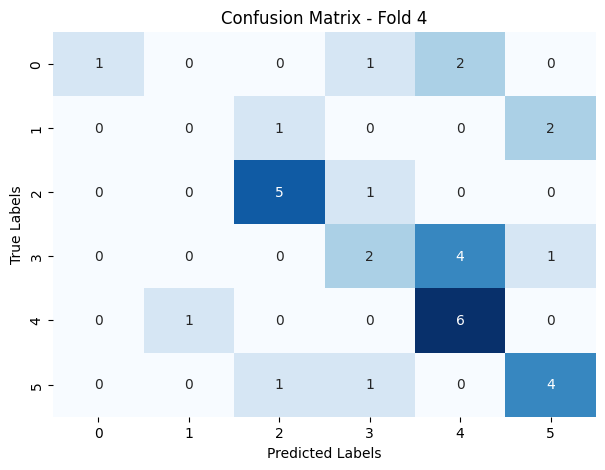

Confusion Matrix - Fold 5:
[[2 0 0 1 0 1]
 [0 1 0 1 1 0]
 [0 0 4 0 0 2]
 [0 1 2 2 2 0]
 [0 1 0 0 6 0]
 [1 0 0 0 0 5]]



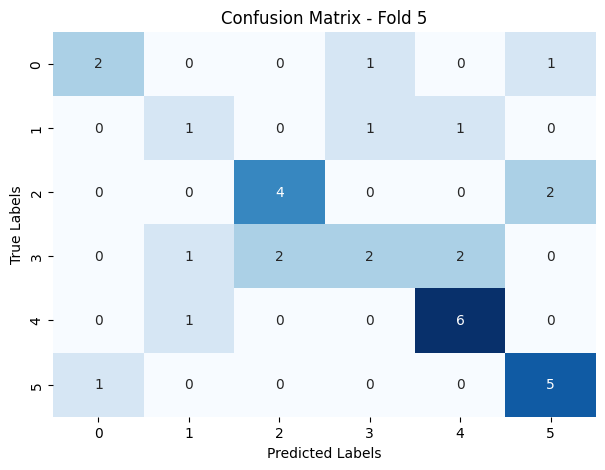

Hasil Cross-Validation:
Fold 1: 0.38235294117647056
Fold 2: 0.38235294117647056
Fold 3: 0.6060606060606061
Fold 4: 0.5454545454545454
Fold 5: 0.6060606060606061


In [141]:
# Lakukan cross-validation untuk memperoleh prediksi di setiap fold
predicted_labels_cv = cross_val_predict(svm_model, X_train, y_train, cv=cv)

# Hitung confusion matrix untuk setiap fold
for i, (train_idx, test_idx) in enumerate(cv.split(X_train, y_train), start=1):
    fold_X_train, fold_X_test = X_train[train_idx], X_train[test_idx]
    fold_y_train, fold_y_test = y_train[train_idx], y_train[test_idx]

    svm_model.fit(fold_X_train, fold_y_train)
    fold_predictions = svm_model.predict(fold_X_test)

    cm = confusion_matrix(fold_y_test, fold_predictions)

    # Tampilkan confusion matrix untuk setiap fold
    print(f'Confusion Matrix - Fold {i}:\n{cm}\n')

    # Visualisasi confusion matrix menggunakan heatmap (opsional)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - Fold {i}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Cetak hasil cross-validation
print('Hasil Cross-Validation:')
for i, score in enumerate(cross_val_scores, start=1):
    print(f'Fold {i}: {score}')

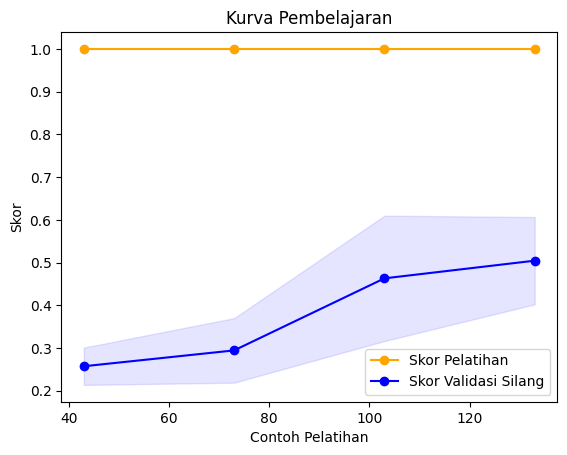

In [142]:
# Plot kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='orange', label='Skor Pelatihan')
plt.plot(train_sizes, test_scores_mean, 'o-', color='blue', label='Skor Validasi Silang')
plt.fill_between(train_sizes, train_scores_mean - np.std(train_scores, axis=1),
                 train_scores_mean + np.std(train_scores, axis=1), alpha=0.1, color='orange')
plt.fill_between(train_sizes, test_scores_mean - np.std(test_scores, axis=1),
                 test_scores_mean + np.std(test_scores, axis=1), alpha=0.1, color='blue')
plt.xlabel('Contoh Pelatihan')
plt.ylabel('Skor')
plt.legend(loc='best')
plt.title('Kurva Pembelajaran')
plt.show()

In [143]:
# Print informasi tentang data pelatihan
print('Jumlah data pelatihan:', len(X_train))
print('Dimensi data pelatihan:', X_train.shape)
print('Jumlah label pelatihan:', len(y_train))

# Print informasi tentang data pengujian
print('\nJumlah data pengujian:', len(X_val))
print('Dimensi data pengujian:', X_val.shape)
print('Jumlah label pengujian:', len(y_val))

Jumlah data pelatihan: 167
Dimensi data pelatihan: (167, 16384)
Jumlah label pelatihan: 167

Jumlah data pengujian: 114
Dimensi data pengujian: (114, 16384)
Jumlah label pengujian: 114
